In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the cleaned dataset
ds=pd.read_csv("new_cleaned_data.csv")
ds

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [5]:
# removing unnamed column
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]         
ds

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


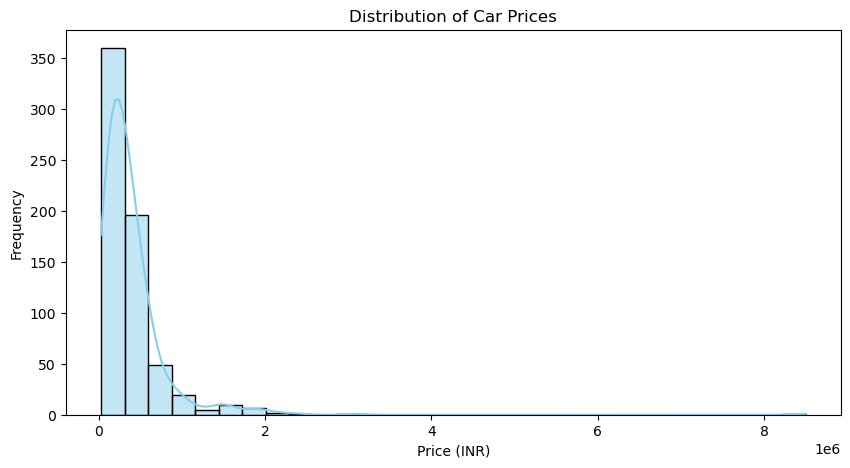

In [6]:
#Distribution of car prices
plt.figure(figsize=(10,5))
sns.histplot(ds['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

The graph shows how car prices are spread. A right-skew indicates most cars are in the lower price range.

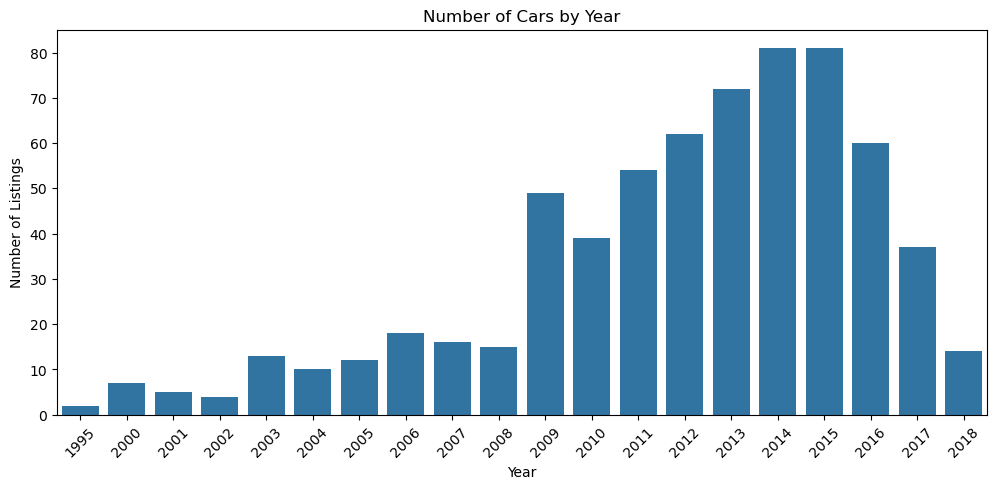

In [8]:
#Cars by manufacturing years
plt.figure(figsize=(12,5))
sns.countplot(data=ds, x='year', order=sorted(ds['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()

Most listed cars are from recent years. Older cars are fewer due to wear or less demand.

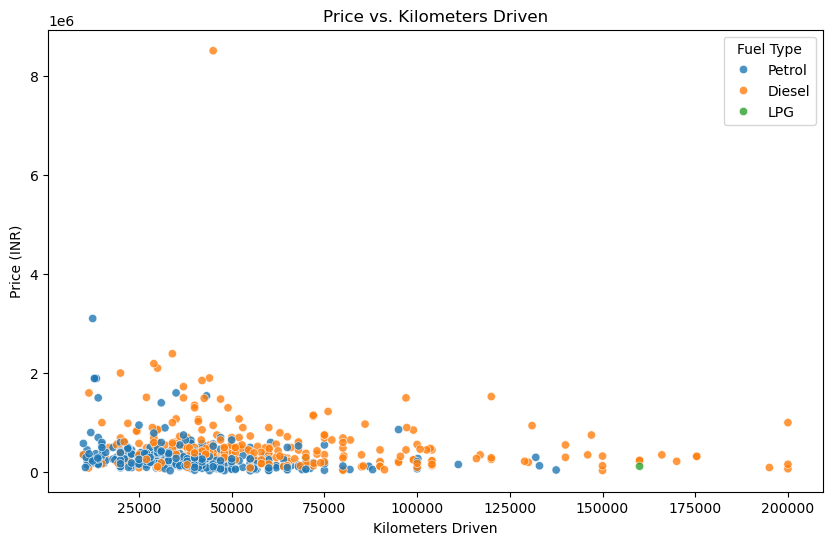

In [9]:
#KMS_driven vs Price(Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=ds, x='kms_driven', y='Price', hue='fuel_type', alpha=0.8)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.legend(title='Fuel Type')
plt.show()

Price generally drops as the kilometers increase. Fuel type may also influence price trends.

C:\Users\Siddhi\AppData\Local\Temp\ipykernel_8648\1454186964.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


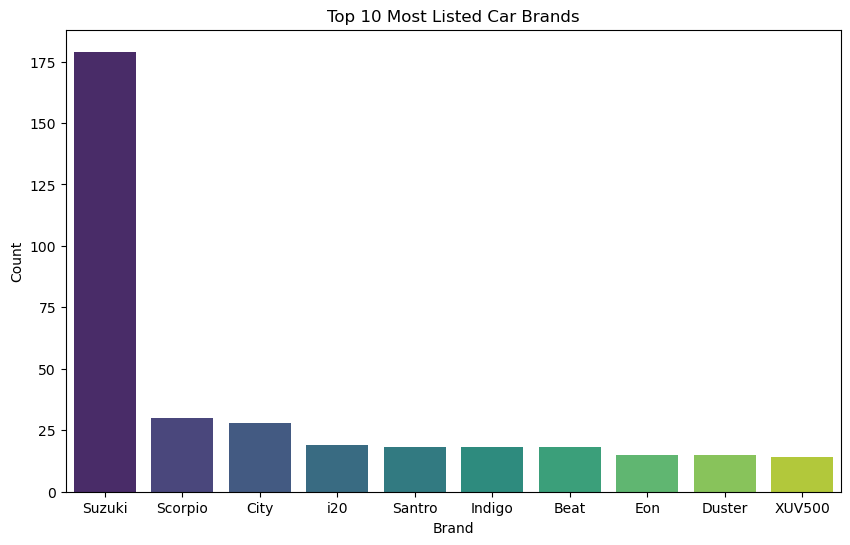

In [10]:
#Top 10 most listed car brands
ds['brand'] = ds['name'].str.split().str[0]  # Extract brand

top_brands = ds['brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Listed Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

These are the most common car brands sold on the platform. Helps understand market trends. Suzuki is the most demanding brand.

C:\Users\Siddhi\AppData\Local\Temp\ipykernel_8648\3404360124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ds[ds['brand'].isin(top5)], x='brand', y='Price', palette='pastel')


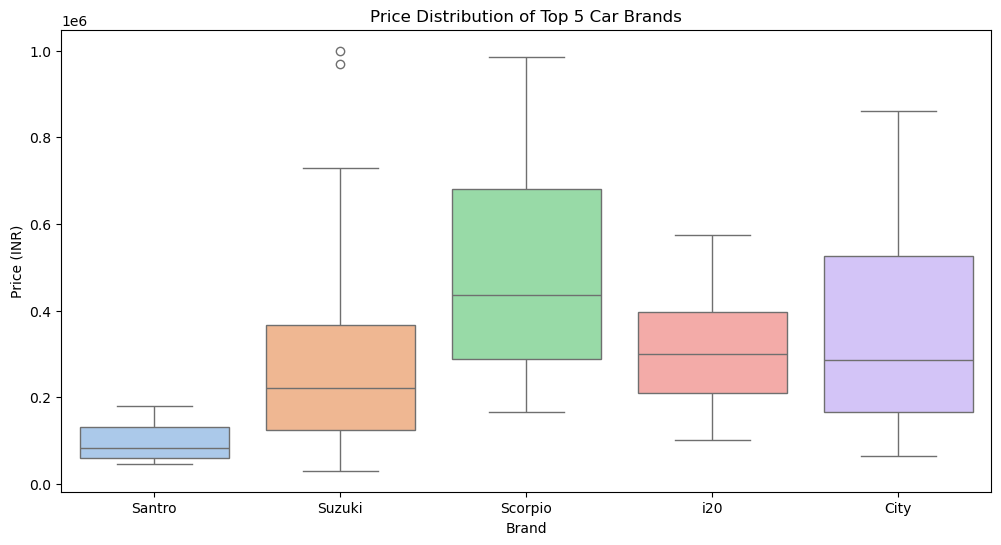

In [11]:
#Price comparison of top brands(Box Plot)
top5 = ds['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=ds[ds['brand'].isin(top5)], x='brand', y='Price', palette='pastel')
plt.title('Price Distribution of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

This shows the price range and outliers per brand. Some brands have higher price variability.
Santro targets the lower-budget segment.
City and Scorpio Brand attract premium buyyers, these brands may have more models/variants.

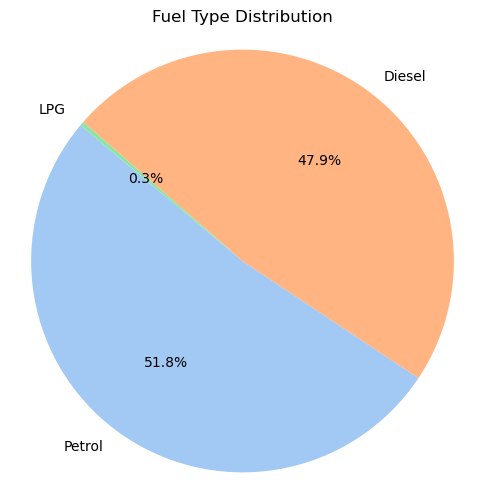

In [12]:
#Fuel type distribution
fuel_counts = ds['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio
plt.show()

It Reveals fuel types Petrol is most common among listed cars.

C:\Users\Siddhi\AppData\Local\Temp\ipykernel_8648\936934261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ds, x='fuel_type', y='Price', estimator='mean', palette='Accent')


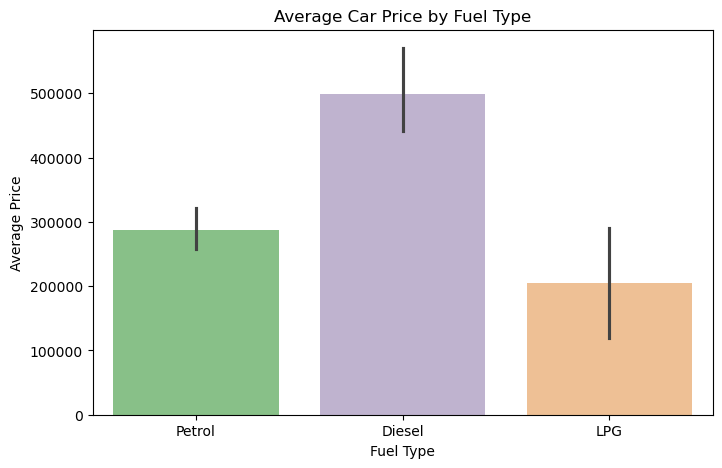

In [13]:
#Average price by fuel type
plt.figure(figsize=(8,5))
sns.barplot(data=ds, x='fuel_type', y='Price', estimator='mean', palette='Accent')
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

Reveals which fuel type tends to have higher average price. Diesel or hybrid cars may often be priced higher.

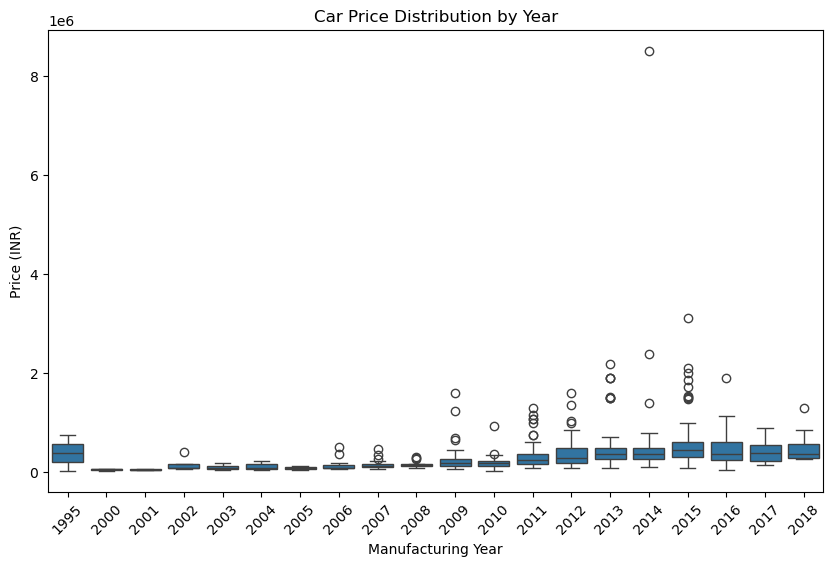

In [14]:
#Relation between year and price
plt.figure(figsize=(10,6))
sns.boxplot(data=ds, x='year', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

Shows how price varies with car age. Usually, newer models have higher prices.

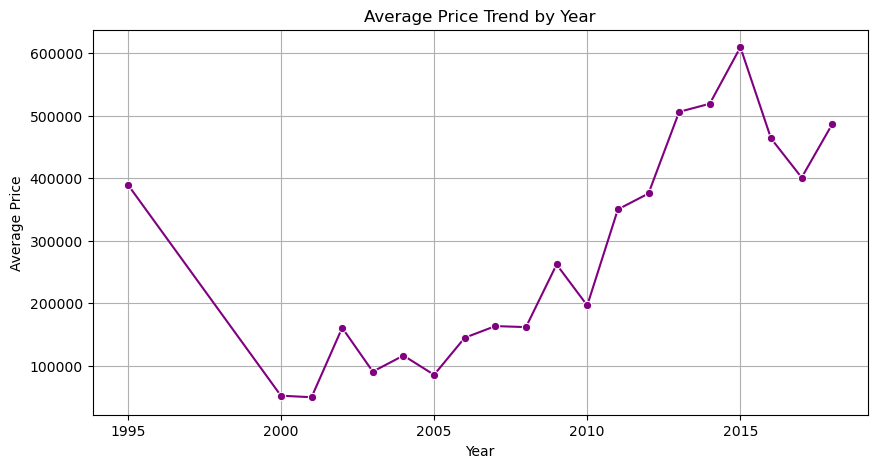

In [15]:
#Price trends over years(Mean price per years)
avg_price_by_year = ds.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color='purple')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Helps identify how car prices have changed over the years. Useful for trend analysis.

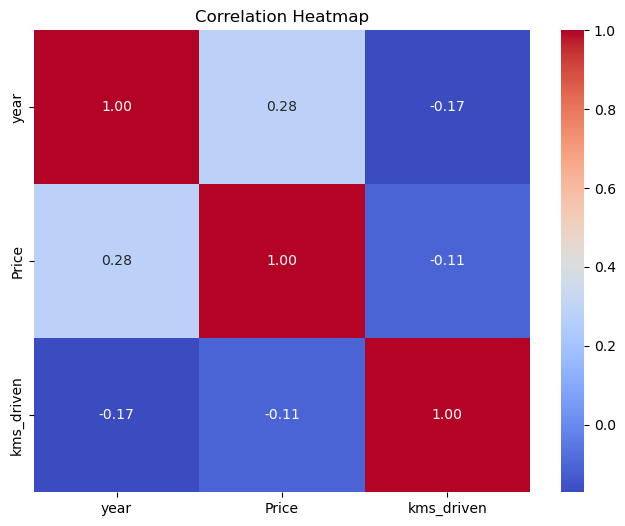

In [16]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
numeric_cols = ds.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Shows correlation between numeric variables like price, mileage, year, kms driven. Useful to identify predictive features.
As manufacturing increases, the price also increases.
The more a car is driven, the lower its resale value.